In [1]:
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Сгенерируем выборку из нормального распределения. Размер выборки равен $N = 10^4$.

In [2]:
N = 10000
sample = sps.norm.rvs(size=N)

Напишем класс для эмпирической функции распределения. Конструктор класса принимает на вход выборку и настоящую функцию распределения.

По выборке строится эмпирическая функция распределения: создаются создаём массивы **grid** и **values** которые задают значения эмпирической функции распределения в точках её скачков. Функция распределения однозначно восстанавливается по этим массивам.

Hастоящая функция распределения используется в методе **get_D**, который считает $\sup_{x \in \mathbb R}|F_n(x) - F(x)|$.

In [3]:
class ECDF:
    def __init__(self, sample, cdf):
        # Эмперическая функция распределения будет задана 
        #   набором точек скачков и значениями в них.
        
        # Точки получаем, упорядочивая выборку.
        self.grid = sorted(sample)
        # Добавляем точки слева и справа от выборки,
        #   чтобы график был красивее.
        self.grid.insert(0, self.grid[0] - 1)
        self.grid.append(self.grid[-1] + 1)
        
        # Значение функции распределение в точке — это
        #   количество точек выборки, меньших или равных ей,
        #   делить на размер выборки.
        # Значение функции распределения в точке, 
        #   добавленной слева, будет равно нулю.
        # Значение функции распределения в точке, 
        #   добавленной справа, будет равно одному.
        self.values = np.append(np.arange(len(sample) + 1) / len(sample), [1])
        
        # Сохраняем настоящую функцию распределения и создаём поле d.
        # Они понадобятся при подсчёте D_n.
        self.cdf = cdf
        self.d = -1
            
    def get_grid(self):
        return self.grid
    
    def get_values(self):
        return self.values
    
    def get_D(self):
        # По смыслу задачи ничего не происходит,
        # а так происходит проверка,
        #    не посчитали ли мы значение D_n заранее.
        if (self.d != -1):
            return self.d
        
        # Функция распределения (ФР) монотонна,
        # а эмпирическая функция распределения (ЭФР) ступенчата.
        # Кроме того, у этих функций совпадают
        #    значения на бесконечности и минус бесконечности.
        # Из этого следует, что супремум нужно искать на «углах ступенек» —
        #    точках скачков ЭФР.
        # ФР непрерывна. Нужно проверять
        #   + разность между значением ФР и ЭФР,
        #   + разность между значением ФР и пределом ЭФР слева.
        
        # Предел слева равен значению в предыдущей точке.
        left_limit = self.values[1:]
        cdf_values = self.cdf(self.grid)
        diff1 = cdf_values - self.values
        diff2 = cdf_values[:-1] - left_limit
        # Строкой выше срез нужен для совпадения длин.
        # Поскольку справа добавлена псевдоточка,
        # её выкидывание не влияет на результат.
        
        self.d = max(abs(diff1).max(), abs(diff2).max())
        return self.d
        

Теперь нарисуем графики эмпирической функции распределения. Это сделает специальная функция.

In [4]:
def draw_ecdf_plot(sample, cdf):
    ecdf = ECDF(sample, cdf)
    grid = np.linspace(ecdf.get_grid()[0], ecdf.get_grid()[-1], num=100000)
    
    plt.figure(figsize=(12, 5)).suptitle("n = " + str(len(sample)), fontsize=14)
    plt.axis([ecdf.get_grid()[0], ecdf.get_grid()[-1], -0.2, 1.2])
    plt.rc('text', usetex=True)
    
    plt.plot(grid, cdf(grid), label=r"$F(x)$")
    plt.step(ecdf.get_grid(), ecdf.get_values(), where="post", label=r"$F_n(x)$")
    plt.scatter(sample, np.zeros(len(sample)), alpha=0.2, label="sample")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

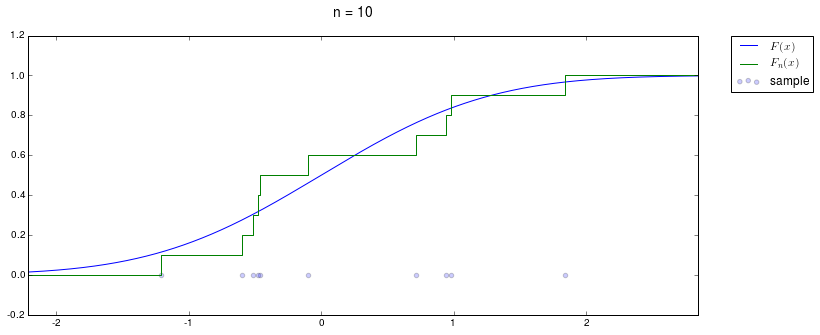

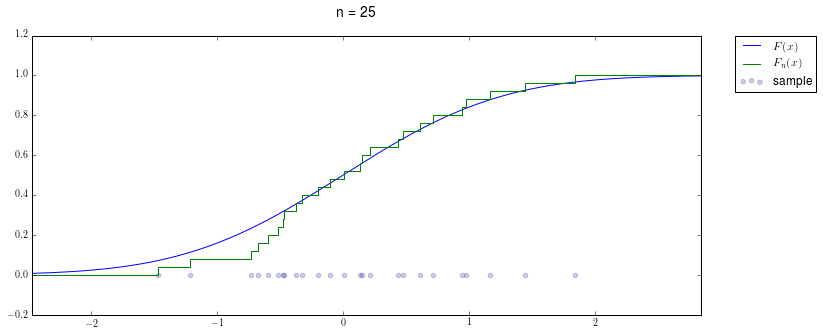

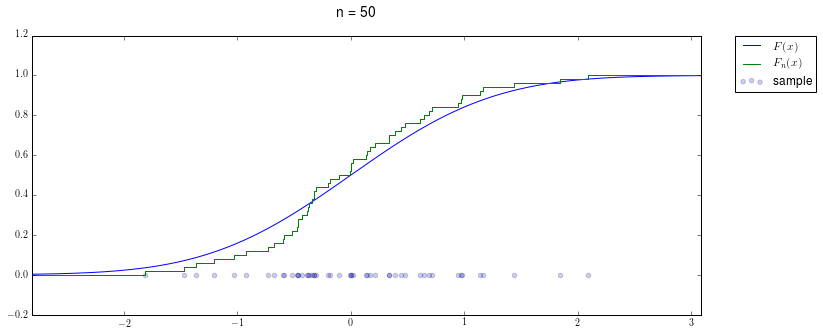

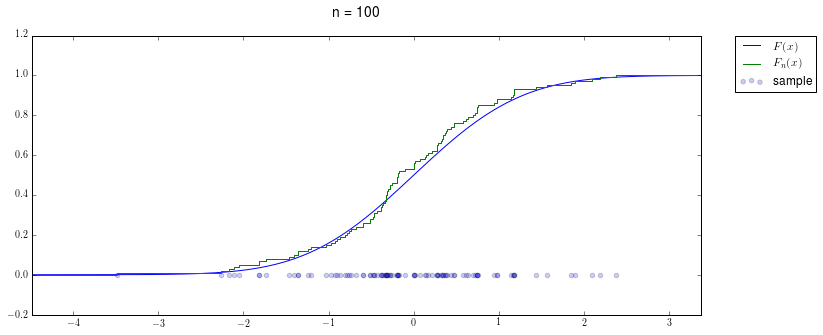

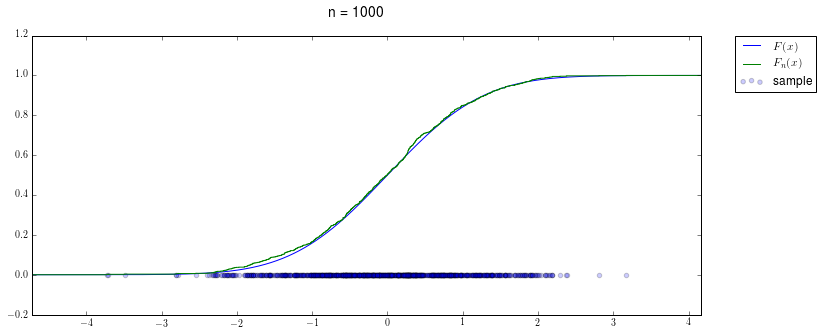

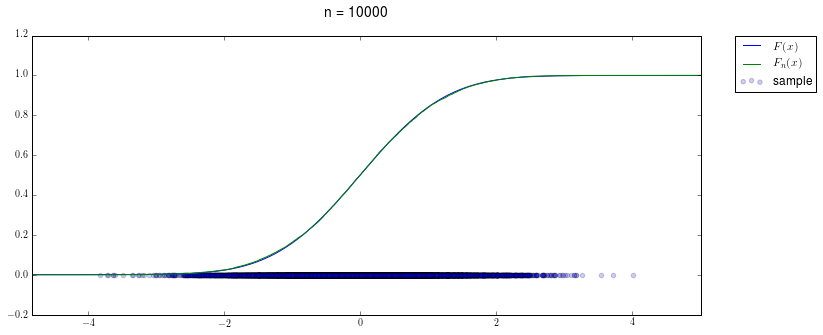

In [5]:
draw_ecdf_plot(sample[:10], sps.norm.cdf)
draw_ecdf_plot(sample[:25], sps.norm.cdf)
draw_ecdf_plot(sample[:50], sps.norm.cdf)
draw_ecdf_plot(sample[:100], sps.norm.cdf)
draw_ecdf_plot(sample[:1000], sps.norm.cdf)
draw_ecdf_plot(sample[:N], sps.norm.cdf)

Сгенерируем $D_n$ для всех $n \le N$

In [6]:
d_n = [ECDF(sample[:i], sps.norm.cdf).get_D() for i in range(1, len(sample) + 1)]

и построим график $D_n(n)$. Рисование графика не стала заворачивать в функцию, потому что всё равно один раз вызываем.

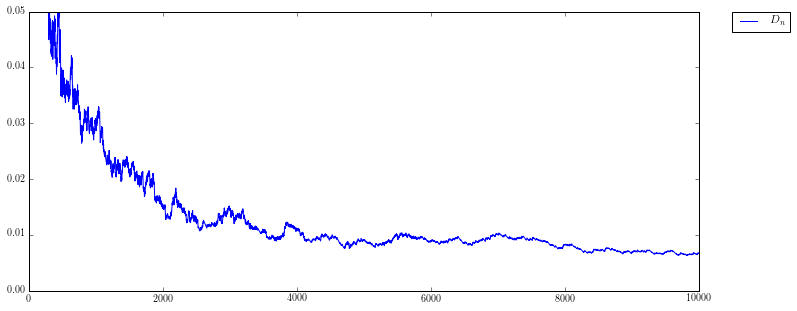

In [7]:
plt.figure(figsize=(12, 5))
plt.axis([0, N, 0, 0.05])
plt.rc('text', usetex=True)
plt.plot(d_n, label=r"$D_n$")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Ещё в задании требовалось посчитать все функции распределения. Я неявно сделала это, когда генерировала $D_n$ для всех $n \le N$.